# Tutorial 5

**CS3481 Fundamentals of Data Science**

*Semester B 2019/20*
___
**Instructions:**
- same as [Tutorial 1](http://bit.ly/CS3481T1).
- submit your answers through [uReply](https://cityu.ed2.mobi/student/mobile_index.php) section number LM919
___

## Exercise 1 (submit via Canvas discussion page)

(a) Complete the tutorial exercises in in [[Witten11]](https://ebookcentral.proquest.com/lib/cityuhk/reader.action?docID=634862&ppg=604) **Varying Amount of Training Data** from **Ex 17.2.9** to **17.2.11**.



___
**Answers to 17.2.9 (no submission required):** 

|Percentage of Training Set| IBk| J48|
|--------------------------|------|------|
|10%|||
|20%|||
|30%|||
|40%|||
|50%|||
|60%|||
|70%|||
|80%|||
|90%|||
|100%|||

**Answers to 17.2.10:** 

**Answers to 17.2.11:** 
___


(b) Complete the tutorial exercises in **Section 17.2** of [[Witten11]](https://ebookcentral.proquest.com/lib/cityuhk/reader.action?docID=634862&ppg=605). If you achieve a better result, please post your classifier output to the Canvas discussion page
  [Interactive Decision Tree Construction](https://canvas.cityu.edu.hk/courses/32828/discussion_topics/226844).



___
**Answer:** 

___


## Exercise 2 (no submission required)

### (a) [[Han11]](https://www.sciencedirect.com/science/article/pii/B9780123814791000034#s0175) **Question 8.2** 

Why is tree pruning useful in decision tree induction? What is a drawback of using a separate set of tuples to evaluate pruning? 

[*Explain also the advantage of using a separate validation set to evaluate pruning.  Construct simple examples to support your argument.*]

___
Answer:

___

### (b) Decision tree induction
For this question, construct decision trees without prunning using the specified algorithms for the following dataset:

|$X_1$|$X_2$|$Y$|
|-----|-----|---|
|0    |0    |0  |
|0    |1    |0  |
|1    |0    |1  |
|1    |1    |0  |
|1    |1    |1  |
|0    |2    |0  |

where $X_1$ and $X_2$ are input attributes and $Y$ is a binary class.


Install and load `graphviz` to draw decision trees.

In [0]:
!apt install -y graphviz
!pip install graphviz

from graphviz import Digraph

styles = {
    'internal': {'shape': 'ellipse'},
    'leaf': {'shape': 'rect'}
}

#### (i) C4.5

Use C4.5 and regard the input attributes as nomimal.

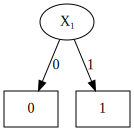

In [13]:
# Modify the following code to draw the desired tree

C45 = Digraph()

C45.node('0', 'X₁', styles['internal']) # use unicode for subscripts, e.g., X₂
C45.node('1', '0', styles['leaf'])
C45.node('2', '1', styles['leaf'])

C45.edge('0', '1', '0')
C45.edge('0', '2', '1')
C45

#### (ii) CART

Use CART and regard the input attributes as numeric.

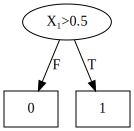

In [22]:
# Modify the following code to draw the desired tree

CART = Digraph()

CART.node('0', 'X₁>0.5', styles['internal']) # use unicode for subscripts, e.g., X₂
CART.node('1', '0', styles['leaf'])
CART.node('2', '1', styles['leaf'])

CART.edge('0', '1', 'F')
CART.edge('0', '2', 'T')
CART

## Exercise 3 (Optional)

Load the iris data set.

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
Y = iris['target']

X.shape, Y.shape # show the dimensions of the input features and target

((150, 4), (150,))

Load the library for decision tree.

In [0]:
from sklearn import tree 

Customize the plot options.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
# set figure size
plt.rcParams["figure.figsize"] = (8,4)
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

### Build decision trees

Note that `sklearn` implements neither C4.5 nor CART. It implements a decision tree algorithm that supports only binary splits on numeric attributes. Nevertheless, one can specify whether Gini or entropy should be used for the splitting criterion. 

#### Split using Gini.

[Text(223.2, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(188.86153846153846, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(257.53846153846155, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(137.35384615384615, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(68.67692307692307, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(34.33846153846154, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(103.01538461538462, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(171.69230769230768, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(240.36923076923077, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(206.03076

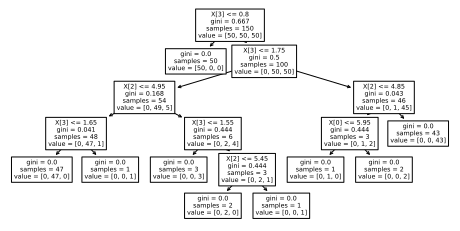

In [20]:
clf_gini = tree.DecisionTreeClassifier() # gini is indeed the default criterion for splitting
clf_gini = clf_gini.fit(X, Y)
tree.plot_tree(clf_gini.fit(X, Y))

#### Split using entropy.

[Text(223.2, 199.32, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(188.86153846153846, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(257.53846153846155, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(137.35384615384615, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(68.67692307692307, 90.6, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(34.33846153846154, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(103.01538461538462, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(171.69230769230768, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(240.36923076923077, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue 

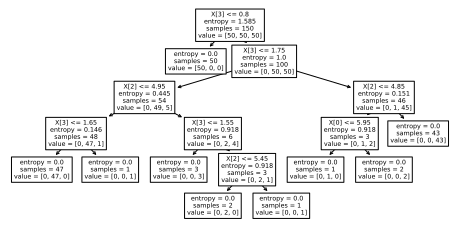

In [21]:
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy")
clf_entropy = clf_entropy.fit(X,Y)
tree.plot_tree(clf_entropy.fit(X, Y))

**Exercise:** Compare the performances using 10-fold cross validation.

**Exercise**: Explore the C5.0 algorithms in `R`. (You may use the [`R` kernel](https://colab.research.google.com/drive/1-iOOVZXMexLf34yREXdYhA0H9YuJSQJ1#scrollTo=fFNVTRzbRP89) in Colab.)